In [1]:
import pandas as pd
df = pd.read_csv("training.csv",header=0)  # replace with your actual path
df.shape
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17331 non-null  int64 
 1   date              17331 non-null  object
 2   likes             17331 non-null  int64 
 3   content           17331 non-null  object
 4   username          17331 non-null  object
 5   media             17331 non-null  object
 6   inferred company  17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64

In [2]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'], inplace=True)
df['media'].fillna('no_media', inplace=True)
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

/tmp/ipykernel_2997/2167161762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)


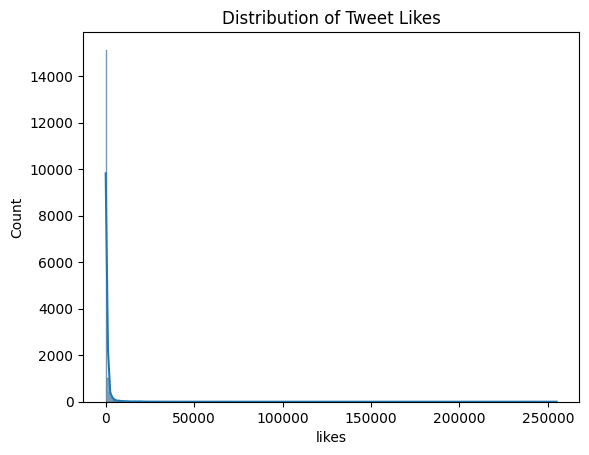

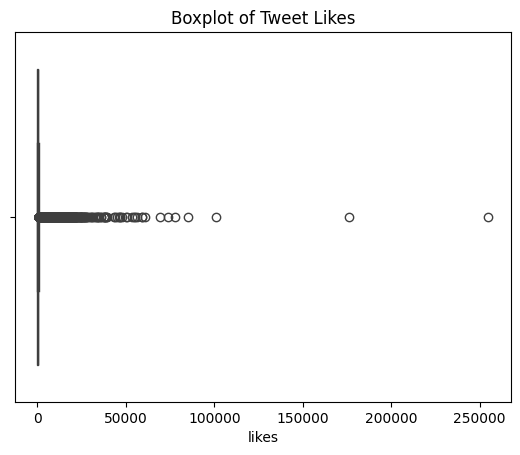

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True)
plt.title("Distribution of Tweet Likes")
plt.show()

sns.boxplot(x=df['likes'])
plt.title("Boxplot of Tweet Likes")
plt.show()


In [4]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

In [5]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

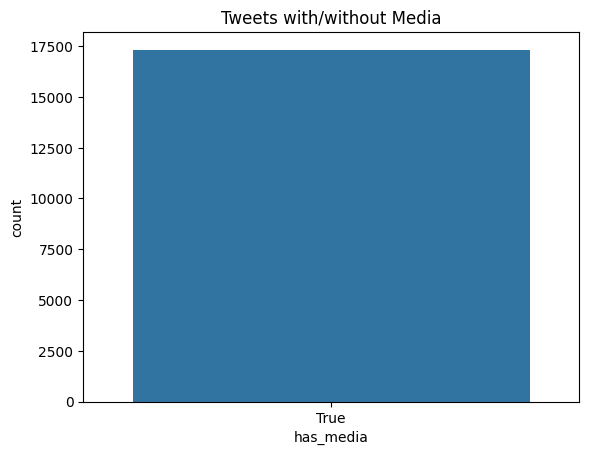

In [6]:
sns.countplot(x=df['has_media'])
plt.title("Tweets with/without Media")
plt.show()


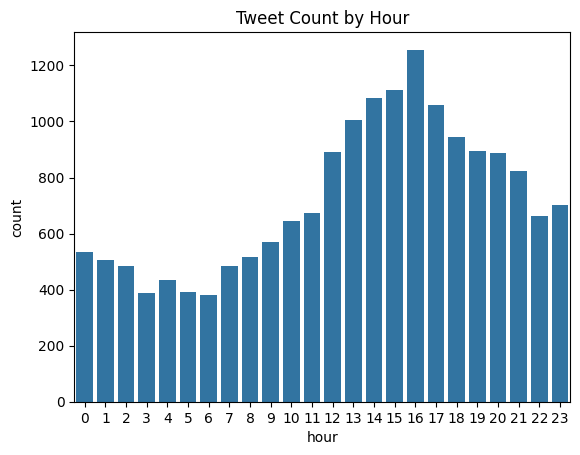

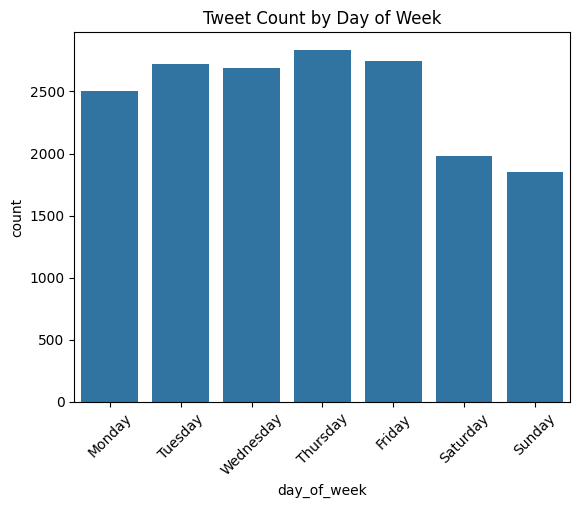

In [7]:
sns.countplot(x=df['hour'])
plt.title("Tweet Count by Hour")
plt.show()

sns.countplot(x=df['day_of_week'], order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Tweet Count by Day of Week")
plt.xticks(rotation=45)
plt.show()


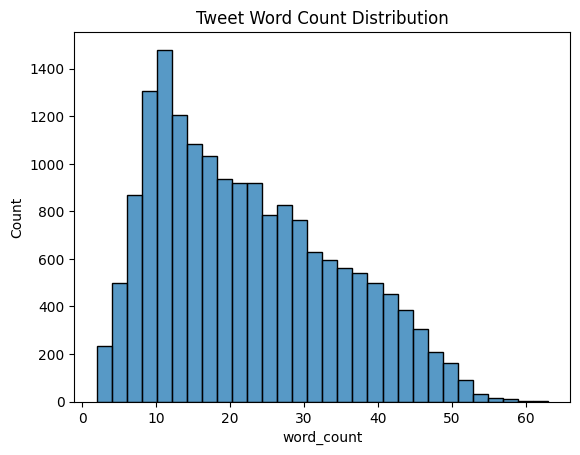

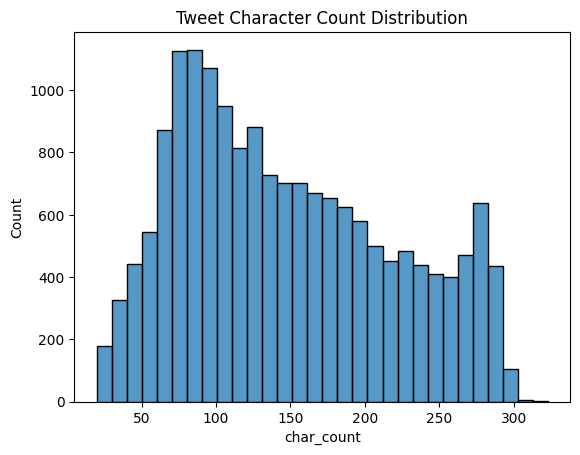

In [8]:
sns.histplot(df['word_count'], bins=30)
plt.title("Tweet Word Count Distribution")
plt.show()

sns.histplot(df['char_count'], bins=30)
plt.title("Tweet Character Count Distribution")
plt.show()


In [ ]:
!pip install textblob

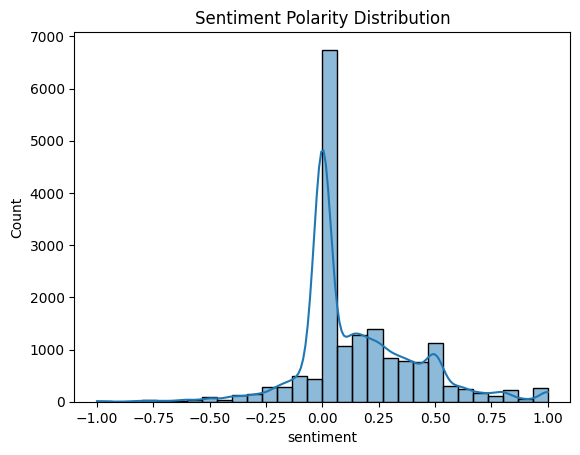

In [10]:
from textblob import TextBlob

df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()




```
Feature list:
company
username
content->word_count,sentiment
media->has_media
datetime->hour,day_of_week
```




In [11]:
df['char_count'] = df['content'].apply(len)

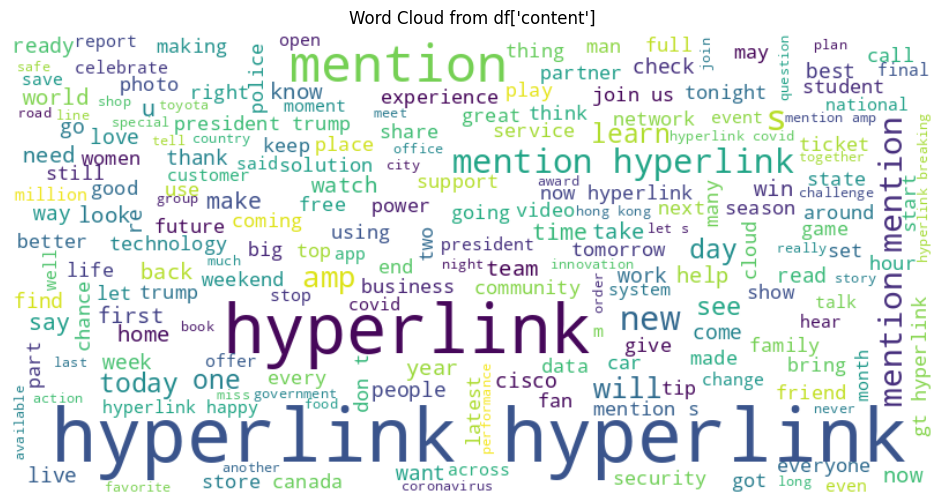

In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['content'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from df['content']")
plt.show()
